In [2]:
import scipy.stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                   index_col='Month', header=0)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.sample(20)

,#Passengers
Month,
1955-03-01,267
1954-07-01,302
1949-02-01,118
1960-01-01,417
1952-05-01,183
1959-09-01,463
1960-11-01,390
1955-12-01,278
1959-01-01,360


In [6]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
data.shape

(144, 1)

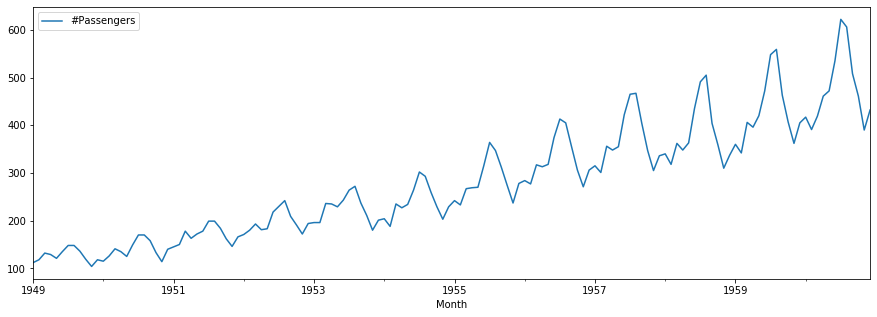

In [8]:
data.plot(figsize=(15, 5))

In [9]:
TEST_SIZE = 24

In [10]:
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

In [11]:
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], data.shape[0]))

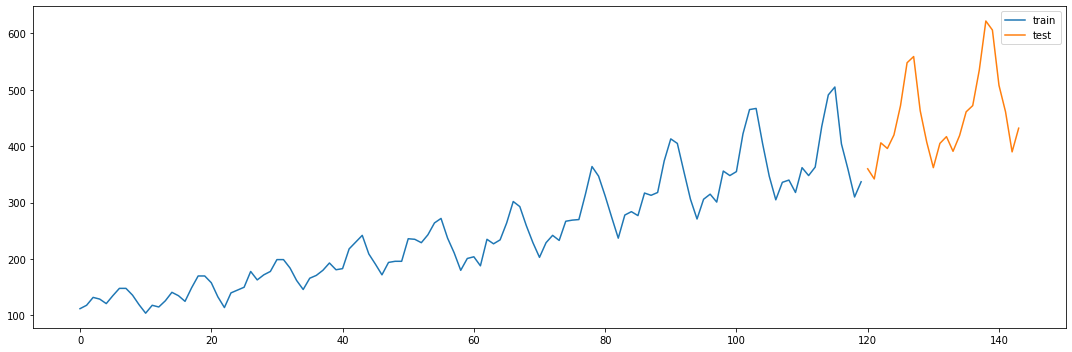

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label='train')
ax.plot(x_test, test, label='test')
plt.legend()
plt.tight_layout()

In [13]:
train.shape

(120, 1)

In [14]:
test.shape

(24, 1)

In [17]:
y_pred_mean = [train.values[-12:].mean()] * 24

In [18]:
y_pred_mean

[381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0,
 381.0]

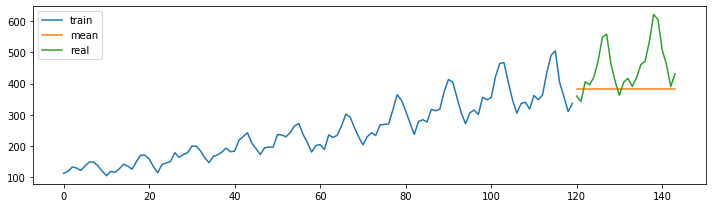

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train, train, label='train')
ax.plot(x_test, y_pred_mean, label='mean')
ax.plot(x_test, test, label='real')
plt.legend()
plt.tight_layout()

In [23]:
x_train.shape, train.shape

((120,), (120, 1))

In [24]:
np.corrcoef(x_train, train.squeeze())

array([[1.       , 0.9140907],
       [0.9140907, 1.       ]])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1, 1), train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_pred_lr = lr_model.predict(x_test.reshape(-1, 1))

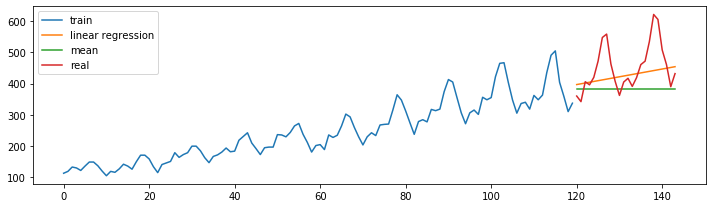

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train, train, label='train')
ax.plot(x_test, y_pred_lr, label='linear regression')
ax.plot(x_test, y_pred_mean, label='mean')
ax.plot(x_test, test, label='real')
plt.legend()
plt.tight_layout()

In [30]:
def mae(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / y_true.size

In [35]:
print('MAE in mean model:', mae(test.values, y_pred_mean))

MAE in mean model: 1868.0


In [36]:
print('MAE in linear regression model:', mae(test.values, y_pred_lr))

MAE in linear regression model: 54.93759857937666


In [37]:
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / y_true.size

In [38]:
print('MSE in mean model:', mse(test.values, y_pred_mean))
print('MSE in linear regression model:', mse(test.values, y_pred_lr))

MSE in mean model: 255678.0
MSE in linear regression model: 5593.208874769766


In [39]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / y_true.size)

In [40]:
print('RMSE in mean model:', rmse(test.values, y_pred_mean))
print('RMSE in linear regression model:', rmse(test.values, y_pred_lr))

RMSE in mean model: 505.6461213141064
RMSE in linear regression model: 74.787758856445


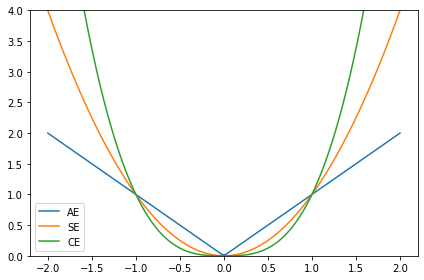

In [43]:
x_example = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_example, np.abs(x_example), label='AE')
ax.plot(x_example, x_example ** 2, label='SE')
ax.plot(x_example, np.abs(x_example) ** 3, label='CE')
ax.set_ylim(0, 4)
plt.legend()
plt.tight_layout()